### Simulation of a DecisionTreeRegressor

In [17]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import numpy as np
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m,1)
y = 4* (X - 0.5) ** 2 # polynomial curve
y = y + np.random.randn(m, 1) / 10

def plot_dataset(X, y):
    plt.figure(figsize=(5, 5))
    plt.scatter(X, y)
    plt.ylabel("y")
    plt.xlabel("X")

# plot_dataset(X, y)


In [18]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)


DecisionTreeRegressor(max_depth=2)

In [19]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_reg, 
    out_file="C:\\Users\\User\\PycharmProjects\\ScikitLearnBook\\regression_tree.dot",
    feature_names=["x1"],
    rounded=True,
    filled= True
)



See differences between restricted and no restricted decision tree regression model

Text(0.5, 1.0, 'min_sample_leaf = 10')

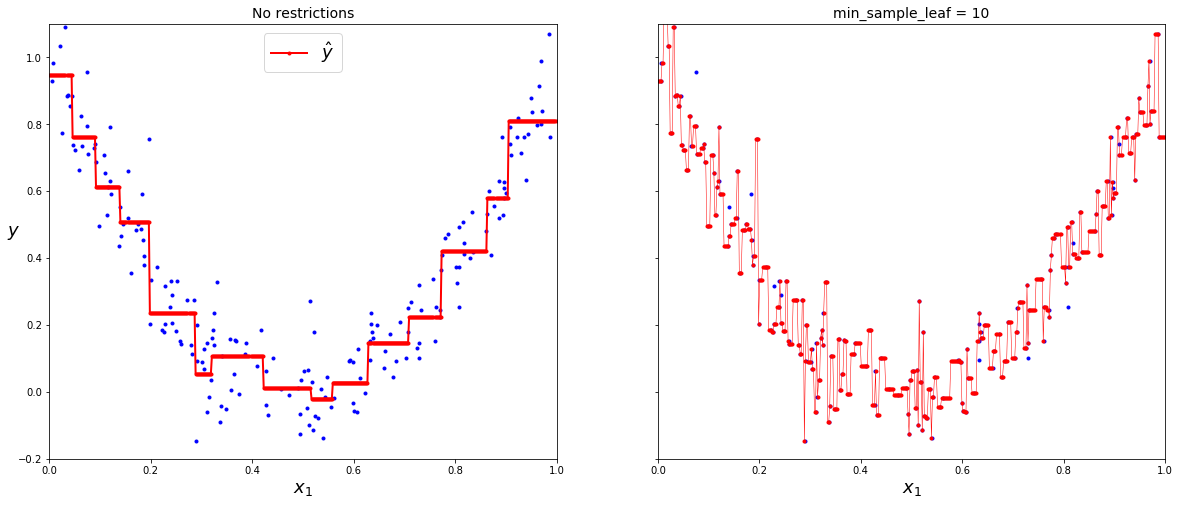

In [20]:
tree_reg1 = DecisionTreeRegressor(min_samples_leaf=10)
tree_reg2 = DecisionTreeRegressor()

tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

axes_array = [0, 1, -0.2, 1.1]
fig, axes = plt.subplots(ncols=2, figsize=(20, 8), sharey=True)
plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis(axes_array)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=0.5, label=r"$\hat{y}$")
plt.axis(axes_array)
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_sample_leaf = 10", fontsize=14)


Text(0.8, 0.0, 'depth=1')

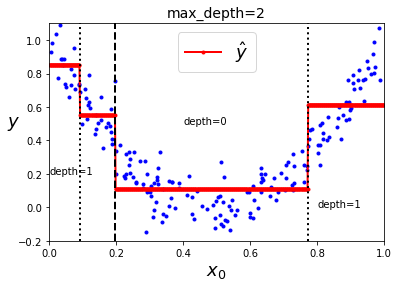

In [30]:
x0 = np.linspace(0, 1, 500).reshape(-1, 1) # One column and number of rows unknown -> 2D array
y_pred = tree_reg.predict(x0)

plt.plot(X, y, "b.")
plt.plot(x0, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis(axes_array)

plt.xlabel("$x_0$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.plot([0.197, 0.197], [axes_array[2], axes_array[3]], "k--", linewidth=2)
plt.plot([0.092, 0.092], [axes_array[2], axes_array[3]], "k:", linewidth=2)
plt.plot([0.772, 0.772], [axes_array[2], axes_array[3]], "k:", linewidth=2)

plt.text(0, 0.2, 'depth=1')
plt.text(0.4, 0.5, 'depth=0')
plt.text(0.8, 0., 'depth=1')